## Занятие 6
### Практическое задание

Понятие введено математиком Джоном Тьюки, цели такого анализа формируются следующим образом:

* максимальное «проникновение» в данные

* выявление основных структур

* выбор наиболее важных переменных

* обнаружение отклонений и аномалий

* проверка основных гипотез

* разработка начальных моделей.


#### 1. Загрузите данные из Nobel_prize.json (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html).

In [31]:
import json
import pandas as pd


with open("samples/Nobel_prize.json", 'r') as f:
    nobel_json = json.loads(f.read())

nobel_json["prizes"] = [prize for prize in nobel_json["prizes"] if "laureates" in prize]

pd.json_normalize(nobel_json, ["prizes", "laureates"], [["prizes", "year"], ["prizes", "category"]])

,id,firstname,surname,motivation,share,prizes.year,prizes.category
0,991,Emmanuelle,Charpentier,"""for the development of a method for genome ed...",2,2020,chemistry
1,992,Jennifer A.,Doudna,"""for the development of a method for genome ed...",2,2020,chemistry
2,995,Paul,Milgrom,"""for improvements to auction theory and invent...",2,2020,economics
3,996,Robert,Wilson,"""for improvements to auction theory and invent...",2,2020,economics
4,993,Louise,Glück,"""for her unmistakable poetic voice that with a...",1,2020,literature
...,...,...,...,...,...,...,...
957,569,Sully,Prudhomme,"""in special recognition of his poetic composit...",1,1901,literature
958,462,Henry,Dunant,"""for his humanitarian efforts to help wounded ...",2,1901,peace
959,463,Frédéric,Passy,"""for his lifelong work for international peace...",2,1901,peace
960,1,Wilhelm Conrad,Röntgen,"""in recognition of the extraordinary services ...",1,1901,physics


#### 2. Проведите исследовательский анализ данных flats_moscow.csv и weather.csv.
* Общая информация о данных.

* Анализ и обработка пропусков и дубликатов. Проверка типов данных.

* Выявление аномалий.

* Исследуйте корреляции между переменными.

In [27]:
import pandas as pd

flats_moscow = pd.read_csv("samples/flats_moscow.csv")
weather = pd.read_csv("samples/weather.csv")

In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [33]:
flats_moscow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


In [43]:
print(weather.isnull().sum())
weather.dropna()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [39]:
flats_moscow.isnull().sum()

Unnamed: 0    0
price         0
totsp         0
livesp        0
kitsp         0
dist          0
metrdist      0
walk          0
brick         0
floor         0
code          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

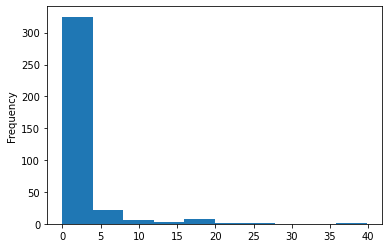

In [47]:
weather["Rainfall"].plot(kind="hist")

In [48]:
weather[weather["Rainfall"] >= 10]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No
22,12.8,18.5,25.8,2.8,0.6,ESE,28.0,S,SE,13.0,...,79,1014.0,1014.9,8,8,14.0,16.8,Yes,0.4,No
30,15.1,20.4,22.6,2.4,0.2,SSE,41.0,E,S,6.0,...,90,1015.0,1014.1,8,8,17.0,16.3,Yes,4.2,Yes
51,19.9,22.0,11.0,4.4,5.9,NNW,76.0,N,WNW,41.0,...,62,996.5,996.8,8,3,20.6,19.6,Yes,17.4,Yes
52,9.2,20.4,17.4,7.8,10.2,ENE,39.0,N,N,9.0,...,49,1009.5,1009.1,1,7,14.9,18.8,Yes,0.0,No
57,15.1,28.3,14.4,8.8,13.2,NNW,28.0,NNW,NW,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,Yes,0.0,No
79,15.3,19.6,18.8,5.0,0.0,NE,33.0,SSE,NNE,9.0,...,88,1008.7,1006.0,8,8,18.0,18.6,Yes,12.2,Yes
80,17.2,24.7,12.2,1.4,8.1,NW,50.0,NW,WNW,19.0,...,71,1004.9,1004.0,7,8,19.4,21.9,Yes,0.8,No
99,12.4,19.9,16.2,5.4,5.6,ENE,41.0,ESE,ESE,7.0,...,58,1007.6,1005.0,7,7,13.6,18.7,Yes,0.0,No


<AxesSubplot:ylabel='Frequency'>

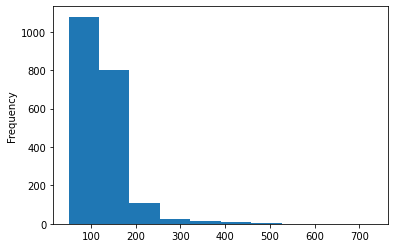

In [49]:
flats_moscow["price"].plot(kind="hist")

In [54]:
price_mean = flats_moscow["price"].mean()
price_std = flats_moscow["price"].std()
flats_moscow[flats_moscow["price"] > price_mean + 3*price_std]

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
4,5,330,104,60,11.0,10.5,7,0,1,1,3
35,36,450,125,80,20.0,9.0,3,1,0,1,4
58,59,340,83,49,19.0,9.0,5,1,1,1,3
83,84,350,80,44,14.0,10.5,10,1,1,0,7
92,93,380,130,72,15.0,7.0,5,0,0,1,4
101,102,470,120,75,18.0,9.0,10,1,1,1,3
150,151,372,158,80,20.0,10.5,10,1,0,1,3
258,259,299,99,65,11.0,9.0,10,1,1,1,3
265,266,450,145,82,14.0,4.5,3,1,1,1,8
363,364,299,100,65,11.0,9.0,10,1,0,1,3


In [57]:
import seaborn as sn
import matplotlib.pyplot as plt

<AxesSubplot:>

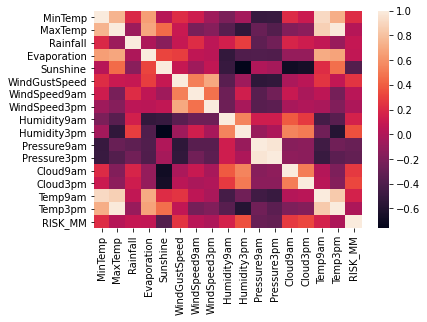

In [59]:
sn.heatmap(weather.corr())

<AxesSubplot:>

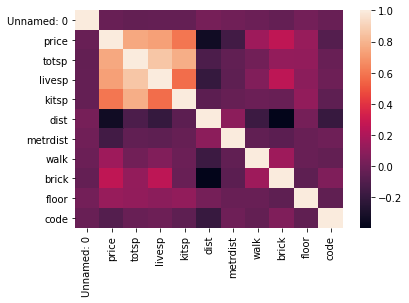

In [60]:
sn.heatmap(flats_moscow.corr())

#### 3. Проведите соединение таблиц sales и states с помощью разных типов джойнов и сравните результаты. Подсчитайте число полученных строк во всех рассмотренных слкчаях (4 типа джойнов).

In [55]:
import pandas as pd
sales = pd.read_excel('https://github.com/datagy/mediumdata/raw/master/pythonexcel.xlsx', sheet_name = 'sales')
states = pd.read_excel('https://github.com/datagy/mediumdata/raw/master/pythonexcel.xlsx', sheet_name = 'states')

In [56]:
sales.head(5)

,Product,Sales,Date,City
0,Bananas,121,2019-06-13,Atlanta
1,Bananas,236,2019-10-20,Atlanta
2,Apples,981,2019-03-12,Atlanta
3,Bread,996,2019-07-28,New York City
4,Brocolli,790,2019-10-22,New York City


In [25]:
states.head(5)

,City,State
0,Atlanta,Georgia
1,New York City,New York
2,Toronto,Ontario
3,Portland,Oregon


In [89]:
states["City"] = states["City"].astype(str)
sales["City"] = sales["City"].astype(str)


In [94]:
lft = sales.merge(states, on="City", how="left")
print(lft.shape)
lft.head()

(50, 5)


,Product,Sales,Date,City,State
0,Bananas,121,2019-06-13,Atlanta,Georgia
1,Bananas,236,2019-10-20,Atlanta,Georgia
2,Apples,981,2019-03-12,Atlanta,Georgia
3,Bread,996,2019-07-28,New York City,New York
4,Brocolli,790,2019-10-22,New York City,New York


In [75]:
rgh = sales.merge(states, on="City", how="right")
print(rgh.shape)
rgh.head()

(50, 5)


,Product,Sales,Date,City,State
0,Bananas,121,2019-06-13,Atlanta,Georgia
1,Bananas,236,2019-10-20,Atlanta,Georgia
2,Apples,981,2019-03-12,Atlanta,Georgia
3,Bananas,852,2019-03-21,Atlanta,Georgia
4,Bread,576,2019-09-14,Atlanta,Georgia


In [79]:
inn = sales.merge(states, on="City", how="inner")
print(inn.shape)
inn.head()

(50, 5)


,Product,Sales,Date,City,State
0,Bananas,121,2019-06-13,Atlanta,Georgia
1,Bananas,236,2019-10-20,Atlanta,Georgia
2,Apples,981,2019-03-12,Atlanta,Georgia
3,Bananas,852,2019-03-21,Atlanta,Georgia
4,Bread,576,2019-09-14,Atlanta,Georgia


In [80]:
out = sales.merge(states, on="City", how="outer")
print(out.shape)
out.head()

(50, 5)


,Product,Sales,Date,City,State
0,Bananas,121,2019-06-13,Atlanta,Georgia
1,Bananas,236,2019-10-20,Atlanta,Georgia
2,Apples,981,2019-03-12,Atlanta,Georgia
3,Bananas,852,2019-03-21,Atlanta,Georgia
4,Bread,576,2019-09-14,Atlanta,Georgia
